In [195]:
import numpy as np
from numpy import exp
def mult(a, b):
    res = np.matrix(np.zeros(a.shape))
    for i in range(a.shape[0]):
        res[i] = a[i]*b[i]
    return res
def ff(x):
    return 100.0*exp(-mult((10.0*(x-0.5)),(10.0*(x-0.5))))

In [258]:
def NewtonSolver(f, u0, eps=10**-12, h = 10**-5):
    u = u0
    dx = np.matrix(np.ones(u0.shape))
    i = 0
    fu = np.zeros( (u0.shape[0], u0.shape[0]) )
    while abs(min(dx).item(0)) > eps :
        print("Iteration:", i)
        i+=1
        du = np.matrix(np.zeros(u0.shape), dtype = np.float64)
        for j in range( u0.shape[0] ):
            du[j-1] = 0 
            du[j] = h
            val = ( f(u+du) - f(u-du) )/(2*h)
            for k in range( u0.shape[0] ):
                fu[j][k]= val[k] 
        fu = fu.T
        dx = -1 * np.linalg.inv(fu) * f(u)
        u = u + dx
    return u

Для этой задачи можно написать следующую разностную схему:
\begin{equation} \label{c5eq2}
	\begin{cases}
		\displaystyle \left( u_{n+1} - u_n \right) \left( k_0 + k_1 \frac{u_n^2 + u_{n+1}^2}{2} \right) - \left( u_n - u_{n-1} \right) \left( k_0 + k_1 \frac{u_n^2 + u_{n-1}^2}{2} \right) - h^2 f_n = 0 \\
		u_0 = u_N = 0
	\end{cases}.
\end{equation}
Здесь $h$ - шаг равномерной сетки, $N$ - число интервалов сетки. Данная система уравнений является нелинейной и решать ее лучше всего методом Ньютона.

In [262]:
global N, k0, k1, u0v, uNv, x
N = 128
k0 = 1
k1 = 0.05
u0v = 0
uNv = 0 
x = np.linspace(-1, 1, N+1)
def F(u):
    global N, k0, k1, u0v, uNv, x
    res = np.matrix( np.zeros((N - 1, 1)) )
    i = 0
    res[i] = (u[i+1] - u[i]) * (k0 + k1 * (u[i]**2 + u[i+1]**2)/2) - u[i]*(k0 + k1 * (u[i]**2)/2) - (x[i]-x[i+1])**2*ff(np.matrix(x[i]))
    i = N-2
    p = u[i]
    res[i] = (0 - u[i]) * (k0 + k1 * u[i]**2) - (u[i] - u[i-1])*(k0 + k1 * (u[i]**2 + u[i-1]**2)/2) - (x[i]-x[i+1])**2*ff(np.matrix(x[i]))
    for i in range(1, N-2):
        res[i] = (u[i+1] - u[i]) * (k0 + k1 * (u[i]**2 + u[i+1]**2)/2) - (u[i] - u[i-1])*(k0 + k1 * (u[i]**2 + u[i-1]**2)/2) - (x[i]-x[i+1])**2*ff(np.matrix(x[i]))
    return res

In [263]:
global N
u0 = np.matrix(np.zeros((N-1, 1)))
answer = NewtonSolver(F, u0)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


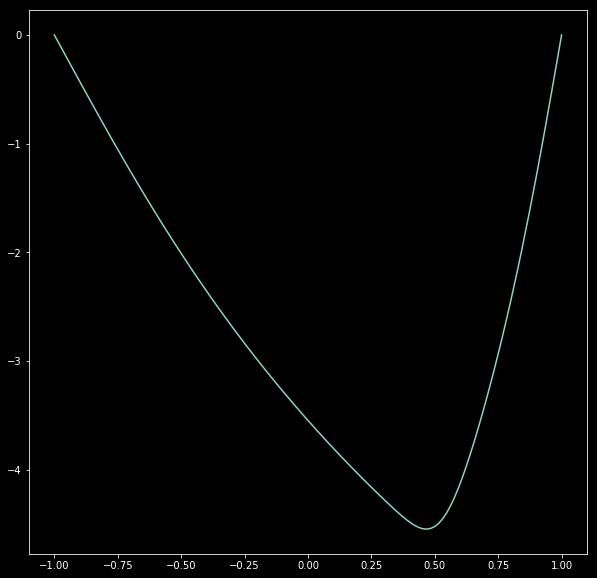

In [266]:
global x
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize = (10,10))
plt.plot(x, [0] + [t[0] for t in answer] + [0])